This is the second fase.
Which is making, training and testing the model.
the data was preprocessed and are saved as .npy files in "processed_data" directory.
To check the preprocessing check the "PreProcessing.ipynb" notebook file.

# imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, AveragePooling2D
from sklearn.metrics import accuracy_score

# loading the data

Getting the training data. and splitting to train and test

In [2]:
X = np.load("./processed_data/data_train.npy")
y = np.load("./processed_data/labels_train.npy")
print(f"shape of data_train: {X.shape}")
print(f"shape of labels_train: {y.shape}")

shape of data_train: (39209, 30, 30, 3)
shape of labels_train: (39209,)


In [3]:
# splitting the trainig data to train and test parts.
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# making them categorical (dummies or one-hot) 
y_train = to_categorical(y_train,43) 
y_test = to_categorical(y_test,43)
print(y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
(31367, 43) (7842, 43)


# model

Making the CNN model using keras.

In [11]:
# model structure 
model = Sequential()

# input in shape of the train data 
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:])) 


model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu')) 
model.add(AveragePooling2D(pool_size=(2,2))) 
model.add(Dropout(rate=0.5))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
model.add(AveragePooling2D(pool_size=(2,2))) 
model.add(Dropout(rate=0.5)) 

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu')) 
model.add(AveragePooling2D(pool_size=(2,2))) 
model.add(Dropout(rate=0.5)) 


model.add(Flatten())
model.add(Dense(256, activation='relu')) 
model.add(Dropout(rate=0.5))
 
# output 43 classes 
model.add(Dense(43, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
average_pooling2d_5 (Average (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
average_pooling2d_6 (Average (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 64)         

In [6]:
# compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 


history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
981/981 [==============================] - 54s 54ms/step - loss: 2.8468 - accuracy: 0.2197 - val_loss: 1.5914 - val_accuracy: 0.4860
Epoch 2/10
981/981 [==============================] - 51s 52ms/step - loss: 1.6107 - accuracy: 0.4905 - val_loss: 0.8753 - val_accuracy: 0.7188
Epoch 3/10
981/981 [==============================] - 56s 57ms/step - loss: 1.0916 - accuracy: 0.6530 - val_loss: 0.5005 - val_accuracy: 0.8484
Epoch 4/10
981/981 [==============================] - 52s 53ms/step - loss: 0.8149 - accuracy: 0.7495 - val_loss: 0.3469 - val_accuracy: 0.9023
Epoch 5/10
981/981 [==============================] - 55s 56ms/step - loss: 0.6633 - accuracy: 0.7933 - val_loss: 0.2252 - val_accuracy: 0.9384
Epoch 6/10
981/981 [==============================] - 66s 67ms/step - loss: 0.5756 - accuracy: 0.8259 - val_loss: 0.1668 - val_accuracy: 0.9503
Epoch 7/10
981/981 [==============================] - 61s 62ms/step - loss: 0.5233 - accuracy: 0.8390 - val_loss: 0.1469 - val_accuracy:

In [7]:
# saving the trained model
model.save("./models/CNN_Traffic_gen.h5")

visualising the accuracy and loss during training

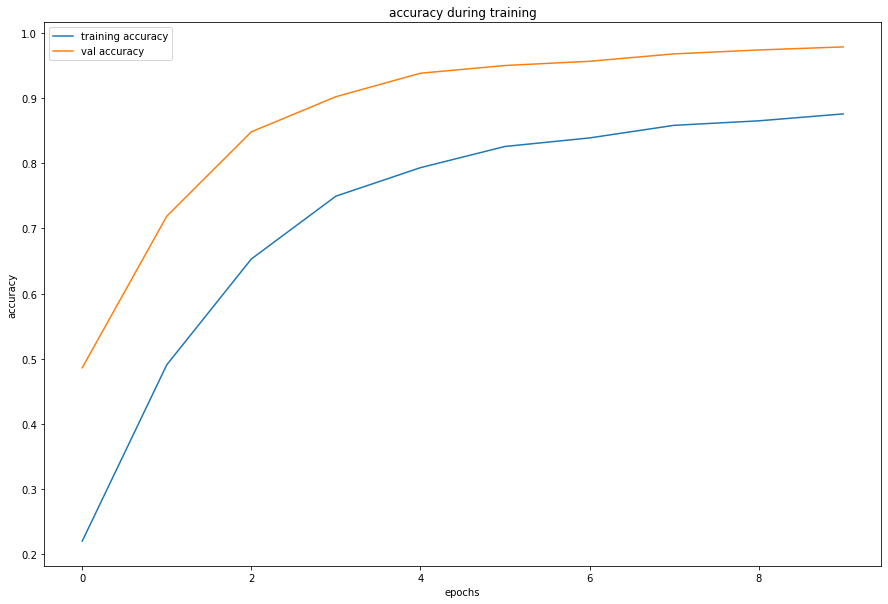

In [8]:
plt.figure(figsize=(15.,10.))
plt.plot(history.history["accuracy"],label="training accuracy")
plt.plot(history.history["val_accuracy"],label="val accuracy")
plt.title("accuracy during training")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

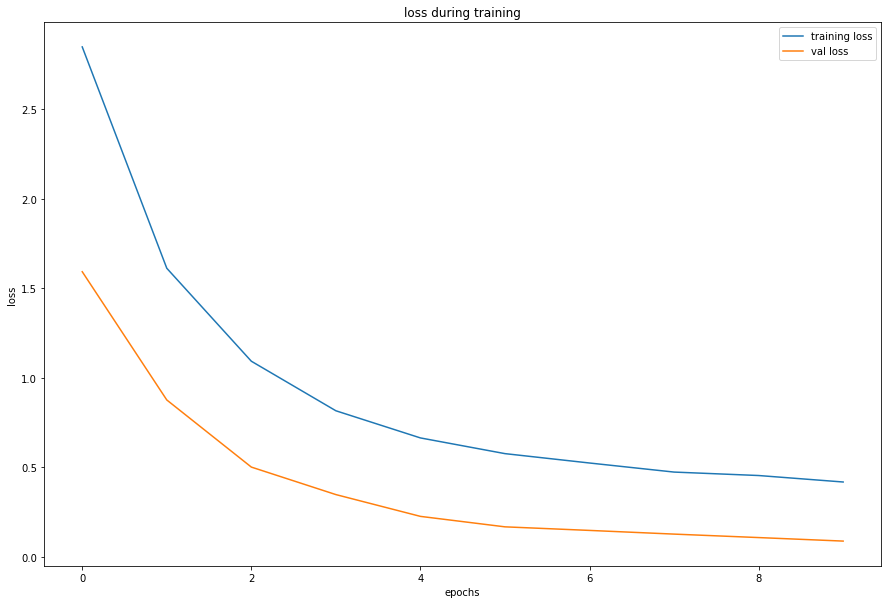

In [9]:
plt.figure(figsize=(15.,10.))
plt.plot(history.history["loss"],label="training loss")
plt.plot(history.history["val_loss"],label="val loss")
plt.title("loss during training")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

# testing the model

testing the model with the provded test data.

In [10]:
# load the testing data
X = np.load("./processed_data/data_test.npy")
y = np.load("./processed_data/labels_test.npy")

# getting the highest estimated class of them
# to match the y array and for the accuracy_score function 
y_pred = np.argmax(model.predict(X), axis=1)

print(y.shape, y_pred.shape)

# testing and getting accuracy score
print(accuracy_score(y ,y_pred))

(12630,) (12630,)
0.9584323040380047
